# Chapter 10 -- Groupby

In [1]:
import polars as pl
from IPython.display import Image

## Setting Display Options

For this notebook, display floats with a field width of 20 and two places left of the decimal.

## Read 'pickled' DataFrame

The pd.read_pickle() function loads the Lending Club Data Frame created in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Save-to-Disk"> Chapter 12, Additional Data Handling</a>.  The pd.read_pickle() method is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html">here</a>. 

In [5]:
loans = pl.read_csv('data/LC_Loan_Stats.csv')
loans.shape

(42630, 51)

Display attribute information for the 'loans' DataFrame.

In [7]:
loans.describe()

statistic,ID,Member_ID,Loan_Amnt,Term,Int_Rate,Installment,Grade,Sub_Grade,Emp_Length,Home_Ownership,Annual_Inc,Verification_Status,Loan_Status,Purpose,Zip_Code,Addr_State,DTI,Delinq_2yrs,Earliest_Cr_Line,Inq_Last_6mths,Mths_Since_Last_Delinq,Mths_Since_Last_Record,Open_Acc,Pub_Rec,Revol_Bal,Revol_Util,Total_Acc,Initial_List_Status,Out_Prncp,Out_Prncp_Inv,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Prncp,Total_Rec_Int,Total_Rec_Late_Fee,Recoveries,Collection_Recovery_Fee,Last_Pymnt_D,Last_Pymnt_Amnt,Next_Pymnt_D,Last_Credit_Pull_D,Collections_12_Mths_Ex_Med,Mths_Since_Last_Major_Derog,Policy_Code,Application_Type,Annual_Inc_Joint,Acc_Now_Delinq,Chargeoff_Within_12_Mths,Delinq_Amnt,Pub_Rec_Bankruptcies,Tax_Liens
str,f64,f64,f64,str,str,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,str,f64,str,str,f64,f64,f64,f64,f64
"""count""",42630.0,42630.0,42630.0,"""42630""","""42630""",42630.0,"""42630""","""42630""","""42630""","""42630""",42626.0,"""42630""","""42630""","""42630""","""42630""","""42630""",42630.0,42601.0,"""42601""",42601.0,15635.0,3655.0,42601.0,42601.0,42630.0,"""42540""",42601.0,"""42630""",42630.0,42630.0,42630.0,42630.0,42630.0,42630.0,42630.0,42630.0,42630.0,"""42548""",42630.0,"""3221""","""42626""",42485.0,"""0""",42630.0,"""42630""","""0""",42601.0,42485.0,42601.0,41265.0,42525.0
"""null_count""",0.0,0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""",4.0,"""0""","""0""","""0""","""0""","""0""",0.0,29.0,"""29""",29.0,26995.0,38975.0,29.0,29.0,0.0,"""90""",29.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""82""",0.0,"""39409""","""4""",145.0,"""42630""",0.0,"""0""","""42630""",29.0,145.0,29.0,1365.0,105.0
"""mean""",665306.131081,826575.390077,11100.599343,null,null,322.888974,null,null,null,null,69144.694828,null,null,null,null,null,13.375249,0.152133,null,1.080538,35.032107,59.204104,9.345039,0.058121,14301.545344,null,22.125748,null,9.202848,9.177574,12020.202907,11314.282666,9675.282662,2242.817228,1.514954,100.588154,13.935995,null,2615.640169,null,null,0.0,null,1.0,null,null,0.000094,0.0,0.14272,0.045196,0.000024
"""std""",219636.263459,279878.269665,7415.376904,null,null,208.989954,null,null,null,null,64054.374987,null,null,null,null,null,6.725822,0.511764,null,1.526193,22.419266,47.13349,4.494705,0.245623,22003.773645,null,11.592631,null,104.729295,104.487164,9076.820341,9020.722308,7094.29637,2586.298301,7.824238,717.695836,159.44813,null,4387.764112,null,null,0.0,null,0.0,null,null,0.00969,0.0,29.326825,0.208667,0.004849
"""min""",54734.0,70473.0,500.0,""" 36 months""","""0.0603""",15.67,"""A""","""A1""","""1 year""","""MORTGAGE""",1896.0,"""Not Verified""","""Charged Off""","""car""","""007xx""","""AK""",0.0,0.0,"""1-Apr""",0.0,0.0,0.0,1.0,0.0,0.0,"""0%""",1.0,"""f""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""10-Apr""",0.0,"""10-Apr""","""10-Apr""",0.0,null,1.0,"""INDIVIDUAL""",null,0.0,0.0,0.0,0.0,0.0
"""25%""",498675.0,638866.0,5200.0,null,null,165.67,null,null,null,null,40000.0,null,null,null,null,null,8.2,0.0,null,0.0,17.0,0.0,6.0,0.0,3640.0,null,13.0,null,0.0,0.0,5471.580096,4803.59,4404.21,657.93,0.0,0.0,0.0,null,212.07,null,null,0.0,null,1.0,null,null,0.0,0.0,0.0,0.0,0.0
"""50%""",645045.0,824996.0,9750.0,null,null,278.11,null,null,null,null,59000.0,null,null,null,null,null,13.47,0.0,null,1.0,33.0,85.0,9.0,0.0,8832.0,null,20.0,null,0.0,0.0,9694.111385,8960.12,8000.0,1341.92,0.0,0.0,0.0,null,528.88,null,null,0.0,null,1.0,null,null,0.0,0.0,0.0,0.0,0.0
"""75%""",827266.0,1.035351e6,15000.0,null,null,428.63,null,null,null,null,82500.0,null,null,null,null,null,18.68,0.0,null,2.0,51.0,101.0,12.0,0.0,17258.0,null,29.0,null,0.0,0.0,16432.88268,15547.05,13499.99,2806.36,0.0,0.0,0.0,null,3175.71,null,null,0.0,null,1.0,null,null,0.0,0.0,0.0,0.0,0.0
"""max""",1.069522e6,1.304589e6,35000.0,""" 60 months""","""9.99%""",1305.19,"""G""","""G5""","""n/a""","""RENT""",6e6,"""Verified""","""Late (31-120 days)""",

It's usually nicest to work with snake cased columns names (only letters and underscores), so let's normalize that.

In [8]:
loans.columns = [col.lower() for col in loans.columns]

In [9]:
loans.head()

id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
i64,i64,i64,str,str,f64,str,str,str,str,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,str,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str,i64,str,i64,str,str,i64,i64,i64,i64,i64
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,null,null,6,0,25735,"""82.00%""",17,"""f""",0.0,0.0,18896.83002,18419.9,14000.0,4896.83,0.0,0.0,0.0,"""15-Oct""",3609.79,null,"""16-Oct""",0,null,1,"""INDIVIDUAL""",null,0,0,0,0,0
872482,1086681,14000,""" 60 months""","""12.99%""",318.48,"""C""","""C1""","""9 years""","""MORTGAGE""",66996.0,"""Verified""","""Fully Paid""","""debt_consolidation""","""852xx""","""AZ""",21.8,0,"""Sep-00""",0,null,null,6,0,25735,"""82.00%""",17,"""f""",0.0,0.0,18896.83002,18419.9,14000.0,4896.83,0.0,0.0,0.0,"""15-Oct""",3609.79,null,"""16-Oct""",0,null,1,"""INDIVIDUAL""",null,0,0,0,0,0
878770,1093592,32000,""" 36 months""","""15.23%""",1112.9,"""C""","""C5""","""7 years""","""MORTGAGE""",60000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""235xx""","""VA""",7.2,0,"""1-Apr""",1,67,null,7,0,5798,"""40.30%""",32,"""f""",0.0,0.0,37523.12,37523.12,31115.81,6360.07,0.0,47.24,3.06,"""13-May""",36.54,null,"""16-Oct""",0,null,1,"""INDIVIDUAL""",null,0,0,0,0,0
878701,1093515,13150,""" 60 months""","""13.49%""",302.52,"""C""","""C2""","""10+ years""","""MORTGAGE""",54000.0,"""Verified""","""Charged Off""","""debt_consolidation""","""850xx""","""AZ""",23.84,0,"""Jan-96""",1,null,null,15,0,35462,"""60%""",40,"""f""",0.0,0.0,11314.23,11271.07,6338.27,3950.2,30.26,995.5,9.5355,"""14-Dec""",25.0,null,"""16-Oct""",0,null,1,"""INDIVIDUAL""",null,0,0,0,0,0
878693,1093457,13200,""" 60 months""","""14.79%""",312.58,"""C""","""C4""","""3 years""","""RENT""",36000.0,"""Source Verified""","""Fully Paid""","""debt_consolidation""","""857xx""","""AZ""",22.03,0,"""Oct-16""",1,30,null,10,0,4932,"""65.80%""",23,"""f""",0.0,0.0,16657.68788,16231.45,13200.0,3457.69,0.0,0.0,0.0,"""13-Oct""",9163.39,null,"""16-Aug""",0,null,1,"""INDIVIDUAL""",null,0,0,0,0,0


In [18]:
loans.columns

['id',
 'member_id',
 'loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

## Create GroupBy Object

Create the GroupBy object 'grp_grd' using the key column 'grade'. It does not compute anything until an operation is applied to the resulting groups.  One of the simplest aggregation method applied is the len() function used to return the number of groups. The GroupBy: split-apply-combine doc for panda is located <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html"> here</a>.

In [13]:
grp_grd = loans.group_by('grade')
print(type(grp_grd))
print(grp_grd.len())

<class 'polars.dataframe.group_by.GroupBy'>
shape: (7, 2)
┌───────┬───────┐
│ grade ┆ len   │
│ ---   ┆ ---   │
│ str   ┆ u32   │
╞═══════╪═══════╡
│ F     ┆ 1301  │
│ C     ┆ 8761  │
│ D     ┆ 6030  │
│ G     ┆ 512   │
│ A     ┆ 10209 │
│ E     ┆ 3401  │
│ B     ┆ 12416 │
└───────┴───────┘


The GroupBy object has a number of aggregation methods which can be applied to individual group levels, for example .mean().

In [19]:
grp_grd.agg(
    pl.col('annual_inc').mean()
)

grade,annual_inc
str,f64
"""E""",75889.159468
"""C""",68190.211401
"""A""",66722.139908
"""G""",93055.818184
"""B""",67945.151276
"""F""",83093.919992
"""D""",68257.39361


Not surprisingly, the pandas GroupBy logic is analogous to SQL's group by syntax.  

````
    /******************************************************/
    /* c10_groupby_grade.sas                              */
    /******************************************************/
    6       proc sql;
    7       select grade label = 'Grade',
    8              mean(income) label = 'Mean Income'
    9                           
    10       from df
    11       group by grade
    12       order by mean;
````

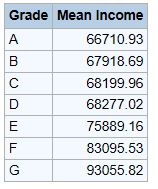

In [20]:
  Image(filename='img/income_groupby_grade.jpg')  

## GroupBy with Aggregations

We can use the .agg() attribute to apply multiple methods to the group levels.

We'll need to rename each one with `alias` as the default name is the original name of the column ('annual_inc') and you can't have multiple of the same column.

In [24]:
grp_grd.agg([
    pl.col('annual_inc').mean().alias('mean_income'),
    pl.col('annual_inc').std().alias('std_income'),
    pl.col('annual_inc').len().alias('count_income'),
])

grade,mean_income,std_income,count_income
str,f64,f64,u32
"""B""",67945.151276,60726.728616,12416
"""E""",75889.159468,55312.076945,3401
"""D""",68257.39361,49017.312481,6030
"""G""",93055.818184,73522.108499,512
"""F""",83093.919992,63747.361873,1301
"""C""",68190.211401,86502.673108,8761
"""A""",66722.139908,54070.823121,10209


The analog SAS program using the MEAN, STD, and COUNT function to produce the same results.

````
    /******************************************************/
    /* c10_groupby_grade_stats.sas                        */
    /******************************************************/
    3       proc sql;
    4       select grade label = 'Grade'
    5              , mean(income) label = 'Mean Income' as mean
    6              , std(income) label = 'Standard Deviation'
    7              , count(income) label = 'Count'
    8       
   9       from df
   10       group by grade
   11       order by mean;
````

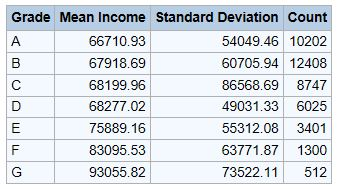

In [26]:
  Image(filename='img/groupby_income_stats.jpg')  

We can requests multiple columns as part of the GroupBy operation.  In this case, loans['income'] and loans['dti'] (debt-to-income ratio).

In [35]:
# create a list of all the aggregations we want
agg_list = []
for c in ["annual_inc", "dti"]:
    agg_list += [
        pl.col(c).count().alias(f"{c}_count"),
        pl.col(c).mean().alias(f"{c}_mean"),
        pl.col(c).std().alias(f"{c}_std"),
        pl.col(c).min().alias(f"{c}_min"),
        pl.col(c).quantile(0.25).alias(f"{c}_q25"),
        pl.col(c).median().alias(f"{c}_median"),
        pl.col(c).quantile(0.75).alias(f"{c}_q75"),
        pl.col(c).max().alias(f"{c}_max"),
    ]

stats_by_grade = loans.group_by("grade").agg(agg_list)
stats_by_grade

grade,annual_inc_count,annual_inc_mean,annual_inc_std,annual_inc_min,annual_inc_q25,annual_inc_median,annual_inc_q75,annual_inc_max,dti_count,dti_mean,dti_std,dti_min,dti_q25,dti_median,dti_q75,dti_max
str,u32,f64,f64,f64,f64,f64,f64,f64,u32,f64,f64,f64,f64,f64,f64,f64
"""C""",8761,68190.211401,86502.673108,4000.0,40000.0,56000.0,80000.0,6e6,8761,13.849608,6.498815,0.0,8.97,14.05,19.0,29.78
"""B""",12416,67945.151276,60726.728616,2000.0,40000.0,57996.0,80500.0,3.9e6,12416,13.39281,6.657743,0.0,8.31,13.505,18.62,29.95
"""G""",512,93055.818184,73522.108499,1896.0,52000.0,75000.0,110000.0,725000.0,512,15.686172,7.285649,0.0,9.94,15.96,21.33,29.96
"""F""",1301,83093.919992,63747.361873,7280.0,50000.0,70802.0,100000.0,1.44e6,1301,14.650169,6.552361,0.0,9.81,15.18,19.75,29.95
"""A""",10205,66722.139908,54070.823121,3300.0,40000.0,57600.0,80000.0,1.9e6,10209,12.043614,7.009408,0.0,6.46,11.5,17.1,29.99
"""E""",3401,75889.159468,55312.076945,4200.0,45000.0,62000.0,90000.0,750000.0,3401,14.184896,6.528932,0.0,9.36,14.62,19.6,29.7
"""D""",6030,68257.39361,49017.312481,4000.0,40000.0,58000.0,82000.0,1.2e6,6030,13.976458,6.43137,0.0,9.16,14.31,19.25,29.63


The GroupBy .len() attribute returns a count of the number of values for each level.  Of course, this same information is available as the loans['count'] column from the operation executed in the cell above.

In [29]:
grp_grd.len()

grade,len
str,u32
"""B""",12416
"""F""",1301
"""D""",6030
"""G""",512
"""C""",8761
"""A""",10209
"""E""",3401


The analog SAS program.

````
    /******************************************************/
    /* c10_groupby_grade_count.sas                        */
    /******************************************************/
    21       proc sql;
    22       select grade
    23              ,count(grade) label='N'
    24       from df
    25       group by grade;
    26       quit;
````

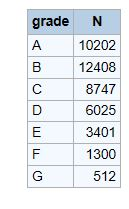

In [30]:
  Image(filename='img/groupby_grade_count.jpg')  

Get characteristics of an individual group.

In [40]:
loans.filter(pl.col('grade') == 'G').height

512

````
    /******************************************************/
    /* c10_groupby_grade_where.sas                        */
    /******************************************************/
    32       proc sql;
    33       select count(grade) label='N'
    34       from df
    35       where grade = 'G'
    36       group by grade;
    37       
    38       quit;
````

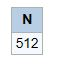

In [41]:
  Image(filename='img/groupby_grade_G.jpg') 

We can chain attributes together to produce the desired results.  Details for sorting values in DataFrames are discussed in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Sort-and-Sort-Sequences"> Sort and Sort Sequences</a> in Chapter 12--Additional Data Handling.

In [45]:
grp_grd.agg(
    pl.col('annual_inc').mean().alias('mean_income')
).sort('mean_income', descending=True)

grade,mean_income
str,f64
"""G""",93055.818184
"""F""",83093.919992
"""E""",75889.159468
"""D""",68257.39361
"""C""",68190.211401
"""B""",67945.151276
"""A""",66722.139908


The analog SAS PROC SQL example.

````
    /******************************************************/
    /* c10_groupby_grade_orderby.sas                      */
    /******************************************************/
    44       proc sql;
    45       select grade
    46              ,mean(income) label='Mean Income'
    47       from df
    48       group by grade
    49       order by 2 descending;
    50       
    51       quit;
````

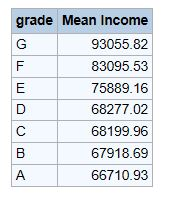

In [46]:
  Image(filename='img/groupby_grade_income_descend.jpg')

## Understanding Binning

In this section, we want to create output displaying the statistics, N, mean, and standard deviation for income by binning the values for loan to debt ratio (loans['dti']) into the categories, 'low', 'medium', 'high'. 

Start by displaying the min and max values for the loans['dti'] column to determine 'bucket' sizes.

In [47]:
print(loans['dti'].min())
print(loans['dti'].max())

0.0
29.99


Return the count of continous values in the column loans['dti'].

In [48]:
loans['dti'].len()

42630

Use the pl.col('..').cut() method to bin continuous vales into discreet values, or categories.  Additional examples for pd.cut() are found in the section "Binning Continuous Values" in Chapter 12, located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Binning-Continuous-Values"> here</a>. pd.cut is analogous to user defined SAS formats. 

In [53]:
bins = [10.0, 20.0]  # cutpoints
names=['Low', 'Medium', 'High']  # bins create three spaces < bin1, between bin1 and 2, above bin2

Create the new column loans['dti_cat'] in the loans DataFrame.

In [58]:
loans = loans.with_columns(
    pl.col('dti').cut(breaks=bins, labels=names).alias('dti_cat')
)
loans['dti_cat'].value_counts(sort=True)

dti_cat,count
cat,u32
"""Medium""",20291
"""Low""",14124
"""High""",8215


We expect the number of values for both the value count for loans['dti'] and categorical values in the  loans['dti_cat'] column to be the same.  

In [55]:
loans['dti'].len() == loans['dti_cat'].len()

True

By default, the pl.cut() method sets the `left_closed` argument to False.  From the doc, "Set the intervals to be left-closed instead of right-closed.` If `left_right == False` (the default), then the bins [1,2,3,4] indicate (1,2], (2,3], (3,4]".

In [57]:
loans.with_columns(
    pl.col('dti').cut(breaks=bins, labels=names, left_closed=True).alias('dti_cat')
)['dti_cat'].value_counts(sort=True)

dti_cat,count
cat,u32
"""Medium""",20309
"""Low""",14076
"""High""",8245


## Applying Functions to Groups

Putting these together, the 'income' column is grouped-by the loans['dti_cat'] column displaying the rows labeled, 'Low', 'Medium', and 'High'.  The .apply() attribute applies the 'stats' function to create the columns, 'count', 'mean', 'std'.  The .unstack() attribute places the output in a 'tall and skinny' format.

In [60]:
loans.group_by("grade").agg([
    # get mean of all columns, except grade
    pl.all().exclude("grade").mean().name.suffix("_mean"),
    pl.all().exclude("grade").std().name.suffix("_std"),
    pl.all().exclude("grade").count().name.suffix("_count")
])


grade,id_mean,member_id_mean,loan_amnt_mean,term_mean,int_rate_mean,installment_mean,sub_grade_mean,emp_length_mean,home_ownership_mean,annual_inc_mean,verification_status_mean,loan_status_mean,purpose_mean,zip_code_mean,addr_state_mean,dti_mean,delinq_2yrs_mean,earliest_cr_line_mean,inq_last_6mths_mean,mths_since_last_delinq_mean,mths_since_last_record_mean,open_acc_mean,pub_rec_mean,revol_bal_mean,revol_util_mean,total_acc_mean,initial_list_status_mean,out_prncp_mean,out_prncp_inv_mean,total_pymnt_mean,total_pymnt_inv_mean,total_rec_prncp_mean,total_rec_int_mean,total_rec_late_fee_mean,recoveries_mean,collection_recovery_fee_mean,…,addr_state_count,dti_count,delinq_2yrs_count,earliest_cr_line_count,inq_last_6mths_count,mths_since_last_delinq_count,mths_since_last_record_count,open_acc_count,pub_rec_count,revol_bal_count,revol_util_count,total_acc_count,initial_list_status_count,out_prncp_count,out_prncp_inv_count,total_pymnt_count,total_pymnt_inv_count,total_rec_prncp_count,total_rec_int_count,total_rec_late_fee_count,recoveries_count,collection_recovery_fee_count,last_pymnt_d_count,last_pymnt_amnt_count,next_pymnt_d_count,last_credit_pull_d_count,collections_12_mths_ex_med_count,mths_since_last_major_derog_count,policy_code_count,application_type_count,annual_inc_joint_count,acc_now_delinq_count,chargeoff_within_12_mths_count,delinq_amnt_count,pub_rec_bankruptcies_count,tax_liens_count,dti_cat_count
str,f64,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""A""",692782.743168,862914.634636,8603.712411,null,null,256.164725,null,null,null,66722.139908,null,null,null,null,null,12.043614,0.044519,null,0.686899,38.973176,47.151316,9.426554,0.014905,11802.041924,null,23.418808,null,0.814876,0.808723,8987.973074,8708.30584,8125.325082,841.337473,0.549595,20.760938,3.113921,…,10209,10209,10198,10198,10198,1864,304,10198,10198,10209,10197,10198,10209,10209,10209,10209,10209,10209,10209,10209,10209,10209,10203,10209,116,10207,10174,0,10209,10209,0,10198,10174,10198,10041,10179,10209
"""C""",641740.215843,795156.421756,10890.132405,null,null,318.242293,null,null,null,68190.211401,null,null,null,null,null,13.849608,0.18458,null,1.311022,34.967851,63.466093,9.197144,0.077441,14518.384888,null,21.213821,null,9.431535,9.403702,11881.340759,11004.507826,9458.898344,2316.530778,1.88042,104.031362,15.617472,…,8761,8761,8755,8755,8755,3857,929,8755,8755,8761,8740,8755,8761,8761,8761,8761,8761,8761,8761,8761,8761,8761,8735,8761,738,8761,8734,0,8761,8761,0,8755,8734,8755,8464,8740,8761
"""D""",642843.005141,797527.097678,11861.131841,null,null,354.161393,null,null,null,68257.39361,null,null,null,null,null,13.976458,0.246807,null,1.380163,33.954636,60.034532,9.19854,0.082103,15320.208789,null,20.998341,null,12.798633,12.776574,13084.445244,12237.997612,9959.890769,2984.492743,2.107695,137.954216,19.014837,…,6030,6030,6029,6029,6029,3020,695,6029,6029,6030,6010,6029,6030,6030,6030,6030,6030,6030,6030,6030,6030,6030,6013,6030,790,6029,6013,0,6030,6030,0,6029,6013,6029,5793,6017,6030
"""B""",678287.190238,843989.385068,11057.051385,null,null,319.695317,null,null,null,67945.151276,null,null,null,null,null,13.39281,0.114219,null,0.866758,36.465619,66.03212,9.191923,0.054812,14157.231395,null,21.945188,null,8.532446,8.495052,11914.038586,11308.048828,10007.036686,1845.04308,1.045815,60.913104,7.242861,…,12416,12416,12406,12406,12406,4072,934,12406,12406,12416,12403,12406,12416,12416,12416,12416,12416,12416,12416,12416,12416,12416,12400,12416,482,12415,12387,0,12416,12416,0,12406,12387,12406,12123,12394,12416
"""E""",653312.635695,809863.277859,14726.249632,null,null,403.958521,null,null,null,75889.159468,null,null,null,null,null,14.184896,0.259412,null,1.493235,32.631073,53.418103,9.617941,0.087353,16611.966186,nu

In [62]:
loans.group_by(loans['dti_cat']).agg([
    pl.col('annual_inc').mean().alias('mean_income'),
    pl.col('annual_inc').std().alias('std_income'),
    pl.col('annual_inc').len().alias('count_income'),
]).sort('dti_cat')

dti_cat,mean_income,std_income,count_income
cat,f64,f64,u32
"""High""",59225.826404,33269.103869,8215
"""Low""",77858.597941,97097.088588,14124
"""Medium""",67096.653436,38910.769644,20291


The analog SAS program uses PROC SQL to find min and man for the 'dti' column, performs the aggregation funtions, and uses the CASE statement to define 'bins' for the new column 'dti_cat'.

````
    /******************************************************/
    /* c10_groupby_dti_cat.sas                            */
    /******************************************************/
    29      proc sql;
    30      select min(dti) as dit_min
    31            ,max(dti) as dti_max
    32      from df;
    33      
    34      select count(income) as count
    35            ,mean(income) as mean
    36            ,std(income) as std
    37            ,
    38      case
    39         when dti < 10 then       'Low'
    40         when 10 <= dti < 20 then 'Medium'
    41         else                     'High'
    42      end as dti_cat
    43      from df
    44      group by calculated dti_cat;
    45      quit;
````

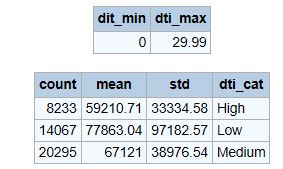

In [63]:
Image(filename='img/groupby_dti_cat_income.jpg') 

For another example define the 'max_min' function for calculating a range and apply it income values grouped by loans['dti_cat'] levels nested inside loans['grade'] levels.

In [70]:
loans_by_income_range = loans.group_by(["grade", "dti_cat"]).agg(
    (pl.col("annual_inc").max() - pl.col("annual_inc").min()).alias("income_range")
)
loans_by_income_range

grade,dti_cat,income_range
str,cat,f64
"""D""","""High""",519200.0
"""C""","""Medium""",335200.0
"""A""","""Medium""",377000.0
"""A""","""High""",234000.0
"""G""","""High""",235800.0
…,…,…
"""G""","""Low""",715400.0
"""B""","""Medium""",483400.0
"""D""","""Medium""",524000.0


In [73]:
loans_by_income_range.pivot(
    index="grade",
    on="dti_cat",
    values='income_range',
).sort('grade')


grade,High,Medium,Low
str,f64,f64,f64
"""A""",234000.0,377000.0,1.8967e6
"""B""",241912.0,483400.0,3.898e6
"""C""",1.2452e6,335200.0,5.996e6
"""D""",519200.0,524000.0,1.1952e6
"""E""",308600.0,350000.0,745800.0
"""F""",216000.0,342720.0,1.4256e6
"""G""",235800.0,598104.0,715400.0


The range for the income values is large with extremes in both directions.  Rather than 'bucketing' these values into arbitrary sizes, another approach is to place values into deciles.  

In [64]:
print(loans['annual_inc'].min())
print(loans['annual_inc'].max())

1896.0
6000000.0


Similar to the pd.cut() method is the pd.qcut() method for creating deciles which is documented <a href="http://pandas.pydata.org/pandas-docs/version/0.15.0/generated/pandas.qcut.html"> here</a>.  The operation below creates the new column loans['inc_cat_dec'] for the 'loans' DataFrame.

In [75]:
loans = loans.with_columns(
    pl.col("annual_inc").qcut(10).alias("inc_cat_dec")
)

Using the income deciles, return a count for each level in descending sorted order.

In [77]:
loans['inc_cat_dec'].value_counts()

inc_cat_dec,count
cat,u32
"""(30000, 37008]""",3441
"""(44500, 50004]""",4312
null,4
"""(65600, 75677.99999999994]""",4255
"""(90000, 116688]""",4085
…,…
"""(75677.99999999994, 90000]""",4440
"""(37008, 44500]""",4262
"""(50004, 59000]""",4314


The bin value ranges are a bit unwieldy.  An alternative is to map the bin value ranges into category codes.

In [81]:
loans = loans.with_columns([
    pl.col("annual_inc").qcut(10).alias("inc_cat_dec"),  # quantile bins
    pl.col("annual_inc").qcut(10).to_physical().alias("inc_cat_dec_code")  # integer codes
])
loans['inc_cat_dec_code'].value_counts(sort=True)

inc_cat_dec_code,count
u32,u32
12,5089
11,4440
5,4314
7,4312
9,4263
…,…
3,4255
4,4165
10,4085


In [83]:
loans['annual_inc'].count() == loans['inc_cat_dec'].count() == loans['inc_cat_dec_code'].count()

True

With SAS, the traditional method for creating deciles is through PROC RANK as illustrated below.

````
    /******************************************************/
    /* c10_default_deciles.sas                            */
    /******************************************************/
    98      proc rank data=df groups=10 out=r_df;
    99           var income;
    100           ranks r_income;
    NOTE: Data set "WORK.r_df" has 42595 observation(s) and 23 variable(s)
    101      
    102      proc sql;
    103         select count(r_income) label='Income Deciles' as count
    104      from r_df
    105      group by r_income
    106      order by count descending;
    107      quit;
````

However, the **default** results between pd.qcut() method and PROC RANK are different.

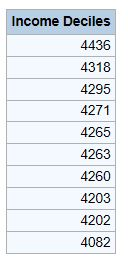

In [84]:
 Image(filename='img/default_income_deciles.jpg') 

The difference are attributable to the method by which PROC RANK handles 'tied' values.  PROC RANK provides the TIES= option and when set to LOW, the results are the same as the pd.qcut() method.  You can read more about how PROC RANK treats tied values <a href="https://support.sas.com/documentation/cdl/en/proc/65145/HTML/default/viewer.htm#n1pe8iekjrnnfin1hdw34ik02tcw.htm#p1lkzb8a7dpbkxn1k6bspo5f9680"> here</a>.

````
    /******************************************************/
    /* c10_deciles_ties_low.sas                           */
    /******************************************************/
57      proc rank data=df groups=10 ties=low out=r_df;
58           var income;
59           ranks r_income;
NOTE: Data set "WORK.r_df" has 42595 observation(s) and 23 variable(s)
60      
61      proc sql;
62         select count(r_income) label='Income Deciles' as count
63      from r_df
64      group by r_income
65      order by count descending;
66      quit;
````

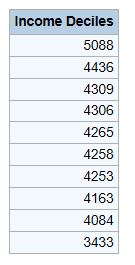

In [85]:
 Image(filename='img/deciles_ties_low.jpg') 

Use the created column loans['inc_cat_dec'] for income deciles to display statistics provided by the 'stats' function created above to return count, mean, and standard deviation.  

In [86]:
loans.group_by(loans['inc_cat_dec_code']).agg([
    pl.col('annual_inc').mean().alias('mean_income'),
    pl.col('annual_inc').std().alias('std_income'),
    pl.col('annual_inc').len().alias('count_income'),
]).sort('inc_cat_dec_code')

inc_cat_dec_code,mean_income,std_income,count_income
u32,f64,f64,u32
null,null,null,4
3,71173.601899,2874.807603,4255
4,62089.659664,2107.903433,4165
5,54526.303377,2338.892362,4314
6,34246.100561,1864.793543,3441
…,…,…,…
8,40734.606211,1885.659394,4262
9,175754.271257,152631.202282,4263
10,101754.345104,6988.95639,4085


pandas crosstabs is another method for accessing GroupBy processing using two factors, or categorical columns.  In the example below, the values= argument is monthly payments loans['income'] column using the aggregation function count.  Additional crosstab examples are found in the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Crosstabs"> crosstabs</a> section of Chapter, 12--Additional Data Handling.

In [110]:
agg_df = loans.group_by(["dti_cat", "inc_cat_dec_code"]).agg(
    pl.col("annual_inc").len().alias("count")
)

# Step 2: Pivot to get crosstab format
crosstab = agg_df.pivot(
    index="dti_cat",
    on="inc_cat_dec_code",
    values="count"
)
crosstab

dti_cat,8,3,9,10,4,5,6,7,12,null,11
cat,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""High""",1019,810,408,599,819,963,869,968,1016,null,744
"""Low""",1217,1312,2011,1502,1267,1184,967,1285,1895,4,1480
"""Medium""",2026,2133,1844,1984,2079,2167,1605,2059,2178,null,2216


In [ ]:
crosstab(

The analog SAS program uses PROC FREQ.

````    
    /******************************************************/
    /* c10_pd.crosstabs.sas                               */
    /******************************************************/
    5      proc rank data=df groups=10 ties=low out=r_df;
    6          var income;
    7           ranks r_income;
    8
    9      data tables;
    10         set r_df (keep = r_income dti);
    11      length dti_cat $ 6;
    12      if dti < 10 then dti_cat = 'Low';
    13          else if dti < 20 then dti_cat = 'Medium';
    14         else dti_cat = 'High';
    15      
    16      proc freq data=tables order=formatted;
    17      tables dti_cat * r_income /nocol nocum norow nopercent;
````

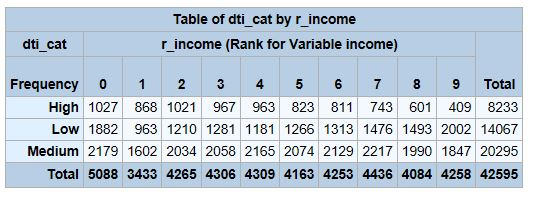

In [111]:
 Image(filename='img/pl_crosstab.jpg') 

## Applying Transformations to Groups

A fairly common pattern is standardization and transformation of values.  In the cell below, the new column loans['iz_all'] is added to the 'loans' DataFrame.  It computes a zscore by subtracting the mean value for income from income and dividing by the standard deviation.   

In [121]:
loans = loans.with_columns(
   ((pl.col('annual_inc') - pl.col('annual_inc').mean()) / pl.col('annual_inc').std()).alias('iz_all')
)

In [122]:
loans['iz_all']

iz_all
f64
-0.033545
-0.033545
-0.142765
-0.236435
-0.517446
…
0.013353
-0.533058
0.341199


However, we want to calculate zscores by deciles rather than the overall mean for income.  Start by creating the grouper for the loans['inc_cat'] column which is the deciles created with the pd.qcut() method above.

In [130]:
loans = loans.with_columns([
    ((pl.col("annual_inc") - pl.col("annual_inc").mean().over("inc_cat_dec_code")) /
     pl.col("annual_inc").std().over("inc_cat_dec_code")).alias("zscore")
])
loans['zscore'].head()

zscore
f64
-1.453176
-1.453176
-0.991345
-0.225022
0.940533
-1.37306
0.940533
1.193476
1.731699


Display the transformed income values.

In [133]:
print(loans['iz_all'].sort(descending=True).head(10), 
      loans['zscore'].sort(descending=True).head(10))

shape: (10,)
Series: 'iz_all' [f64]
[
	null
	null
	null
	null
	92.590948
	59.806302
	30.765101
	28.58283
	26.740645
	21.401431
] shape: (10,)
Series: 'zscore' [f64]
[
	null
	null
	null
	null
	38.158945
	24.400291
	12.212639
	11.29681
	10.523705
	8.28301
]


We would like to display the transformed income values side-by-side.  Create the new DataFrame 'prt' by extracting the loans['iz_all'] column (income zscores computed with column mean) and the loans['iz_grp'] (income zscores computed with the group mean). 

In [135]:
prt = loans.select('iz_all', 'zscore')
type(prt)

polars.dataframe.frame.DataFrame

Provide descriptive column names.

In [136]:
prt.columns = ['zscore w/ overall mean','zscore with group mean']

Display the transformed income values.

In [141]:
prt.drop_nulls().sort('zscore w/ overall mean', descending=True).head(10)

zscore w/ overall mean,zscore with group mean
f64,f64
92.590948,38.158945
59.806302,24.400291
30.765101,12.212639
28.58283,11.29681
26.740645,10.523705
21.401431,8.28301
21.401431,8.28301
20.183716,7.771974
18.435201,7.038179


The analog SAS program combines the creating of income deciles using PROC RANK and PROC SQL to calculate income zscores based on overall mean and income decile group mean.

````
    /******************************************************/
    /* c10_zscore_all_bygroup.sas                         */
    /******************************************************/
    48      proc rank data=df groups=10 ties=low out=r_df;
    49           var income;
    50           ranks r_income;
    51      
    52      proc sql ;
    53      create table all_mean as
    54      select id
    55            ,(income - mean) / std as iz_all format=6.2
    56         from
    57            (select id
    58                    ,income
    59                    ,mean(income) as mean
    60                    ,std(income) as std
    61         from r_df)
    62      order by iz_all desc;
    63      
    64      create table grp_mean as
    65      select id
    66            ,(income - mean) / std as iz_grp format=6.2
    67         from
    68            (select id
    69                    ,income
    70                    ,mean(income) as mean
    71                    ,std(income) as std
    72             from r_df
    73             group by r_income)
    74      order by iz_grp descending;
    75      
    76      create table all(drop=old_id) as
    77      select coalesce(all_mean.old_id, grp_mean.old_id) as id
    78            ,*
    79         from all_mean (rename=(id=old_id))
    80      full join grp_mean (rename=(id=old_id))
    81          on all_mean.old_id = grp_mean.old_id
    82      order by iz_all desc;
    83      
    84      select *
    85         from all(obs=10);
    86      quit;
````

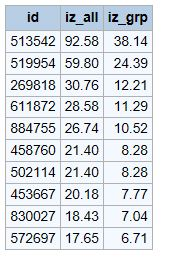

In [142]:
 Image(filename='img/income_zcore_table.jpg') 

## Resources

MERGING vs. JOINING: Comparing the DATA Step with SQL, by Malachy J. Foley, University of North Carolina at Chapel Hill, located <a href="http://www2.sas.com/proceedings/sugi30/249-30.pdf"> here</a>.

## Navigation

* [Next Chapter](10-Polars_Readers.ipynb)
* [Return to Contents](00-Contents.ipynb)